## Домашнее задание №1

**Выполнил:** Головин В.С. (МОАД)

**Задание:** реализовать метод ломаных для поиска минимума функции одной переменной, протестировать написанную программу с помощью следующих функций:

\begin{equation*}
f_1(x) = \frac{x}{100} - \frac{\sin{x}}{x}
\end{equation*}

\begin{equation*}
f_2(x) = \sqrt{1 + \varepsilon - \frac{\sin{x}}{x}}
\end{equation*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq  # мин-куча для метода ломаных
from scipy.optimize import minimize_scalar  # для проверки результатов

Построим графики этих функций:

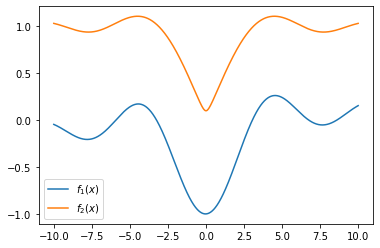

In [2]:
def f1(x):
    if np.abs(x) < 1e-7:
        b = 1
    else:
        b = np.sin(x) / x
    return x / 100 - b

def f2(x, eps=1e-2):
    if np.abs(x) < 1e-7:
        b = 1
    else:
        b = np.sin(x) / x
    return np.sqrt(1 + eps - b)


x = np.linspace(-10, 10, 1000)
plt.figure()
plt.plot(x, [f1(x_i) for x_i in x], label='$f_1(x)$')
plt.plot(x, [f2(x_i) for x_i in x], label='$f_2(x)$')
plt.legend();

Ниже представлена функция `minimize`, решающая поставленную задачу. Код достаточно подробно задокументирован, ломаная функция обозначается как $g(x)$.

In [3]:
def minimize(f, a, b, L, eps=1e-5, return_evals=False, maxfev=10000):
    """
    Найти на отрезке [`a`, `b`] минимум функции `f`, удовлетворяющей
    условию Липшица для `L`, с помощью метода ломаных.
    Точность определяется параметром `eps`.
    При `return_evals=True` дополнительно возвращается число вызовов
    рассматриваемой функции.
    Параметр `maxfev` устанавливает максимальное число вызовов функции.
    """
    # первая точка -- пересечение двух прямых из (a, f(a))
    # и (b, f(b)) с наклоном -L и L, соответственно
    f_a = f(a)
    f_b = f(b)
    x = (a + b) / 2 + (f_a + f_b) / (2 * L)
    g_x = (f_a + f_b + L * (a - b)) / 2
    h = []  # мин-куча
    heapq.heappush(h, (g_x, x))
    
    # итеративно ищем новые точки
    # пока не найдём минимум с заданной точностью
    num_evals = 2  # сколько раз вычислялись значения функции
    while True:
        g_x, x = heapq.heappop(h)  # исключаем точку с минимальным g(x)
        f_x = f(x); num_evals += 1
        delta = 1 / (2 * L) * (f_x - g_x)
        if abs(2 * L * delta) < eps:
            break  # достигнута требуемая точность
        # добавляем новые точки слева и справа от x
        g_new = (f_x + g_x) / 2
        heapq.heappush(h, (g_new, x - delta))
        heapq.heappush(h, (g_new, x + delta))

        if num_evals > maxfev:
            raise Exception('Превышено максимальное число вызовов функции')

    # возвращаем результат
    if not return_evals:
        return x
    return x, num_evals

Проверим работу метода на заданных выше функциях при $L = 0.5$:

In [4]:
x_min, n = minimize(f1, -10, 10, L=0.5, eps=1e-3,
                    return_evals=True)
print(f'Функция f1: минимум: {x_min}, число вызовов: {n}')

Функция f1: минимум: -0.03359620064353541, число вызовов: 106


 Сравним результат с методом `scipy.optimize.minimize_scalar`:

In [5]:
res = minimize_scalar(f1)
print(f'Функция f1: минимум: {res.x}, число вызовов: {res.nfev}')

Функция f1: минимум: -0.030002706981195584, число вызовов: 21


Сделаем то же самое для функции $f_2$

In [6]:
print('1. Метод ломаных')
x_min, n = minimize(f2, -10, 10, L=0.5, eps=1e-3,
                    return_evals=True)
print(f'Функция f2: минимум: {x_min}, число вызовов: {n}')

print('\n2. scipy.optimize.minimize_scalar')
res = minimize_scalar(f2)
print(f'Функция f2: минимум: {res.x}, число вызовов: {res.nfev}')

1. Метод ломаных
Функция f2: минимум: -0.0008412475743320158, число вызовов: 58

2. scipy.optimize.minimize_scalar
Функция f2: минимум: 1.6370734986533456e-11, число вызовов: 18
